In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [35]:
bank_data = pd.read_csv("churn.csv")

In [36]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [38]:
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Задание 9.1 #

In [39]:
exited_0 = bank_data[bank_data['Exited'] == 0]
exited_1 = bank_data[bank_data['Exited'] == 1]

In [40]:
# Количество клиенотв:
print(f'Количество лояльных клиентов - {len(exited_0)}')
print(f'Количество ушедших клиентов - {len(exited_1)}')
print(f'Количество оставшихся клиентов превышает количество ушедших на {round(100 - len(exited_1)/len(exited_0) * 100, 2)}%')

Количество лояльных клиентов - 7963
Количество ушедших клиентов - 2037
Количество оставшихся клиентов превышает количество ушедших на 74.42%


In [ ]:
clients = bank_data.groupby('Exited').count()['RowNumber']

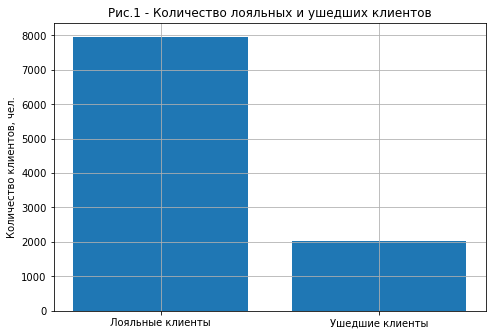

In [41]:
fig_1 = plt.figure()
axes_1 = fig_1.add_axes([0, 0, 1, 1])
axes_1.bar(
    x=['Лояльные клиенты', 'Ушедшие клиенты'], 
    height=clients, 
)
axes_1.set_ylabel('Количество клиентов, чел.')
axes_1.set_title('Рис.1 - Количество лояльных и ушедших клиентов')
axes_1.grid()
plt.show()

Из рисунка 1 видно, что количество лояльных клиентов значительно превышает (на 74.42%) количество ушедших.

# Задание 9.2 #

In [87]:
over_2500_balance = bank_data[bank_data['Balance'] > 2500]
over_2500_balance.median()

RowNumber              4966.00
CustomerId         15689526.00
CreditScore             652.00
Age                      38.00
Tenure                    5.00
Balance              119839.69
NumOfProducts             1.00
HasCrCard                 1.00
IsActiveMember            1.00
EstimatedSalary      101139.30
Exited                    0.00
dtype: float64

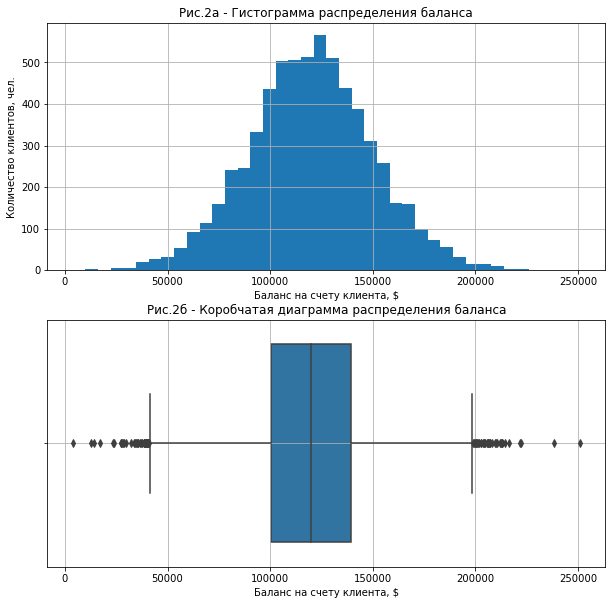

In [89]:
fig_2, axes_2 = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
axes_2[0].hist(x=over_2500_balance['Balance'], bins=40)
axes_2[0].set_xlabel('Баланс на счету клиента, $')
axes_2[0].set_ylabel('Количество клиентов, чел.')
axes_2[0].set_title('Рис.2а - Гистограмма распределения баланса')
axes_2[0].grid()
boxplot=sns.boxplot(
    data=over_2500_balance,
    x='Balance')
boxplot.set_title('Рис.2б - Коробчатая диаграмма распределения баланса')
boxplot.set_xlabel('Баланс на счету клиента, $')
boxplot.grid()

Медианное значение составляет 119839.69 $.


Из графиков, рис. 2а и рис 2б, баланс на счету большей части клиента составляет от 100000$ до 1400000$.

Вид графиков близок к симметричному, что говорит о близости к нормальному распределении данных. Такаже наблюдается большое количество выбросов - это говорит об ошибочных или недостоверных данных - необходимо дополнительное исследование.

# Задание 9.3 #

In [44]:
bank_data['Лояльность клиента'] = bank_data['Exited'].apply(lambda x: 'Лояльный клиент' if x == 0 else 'Ушедший клиент')

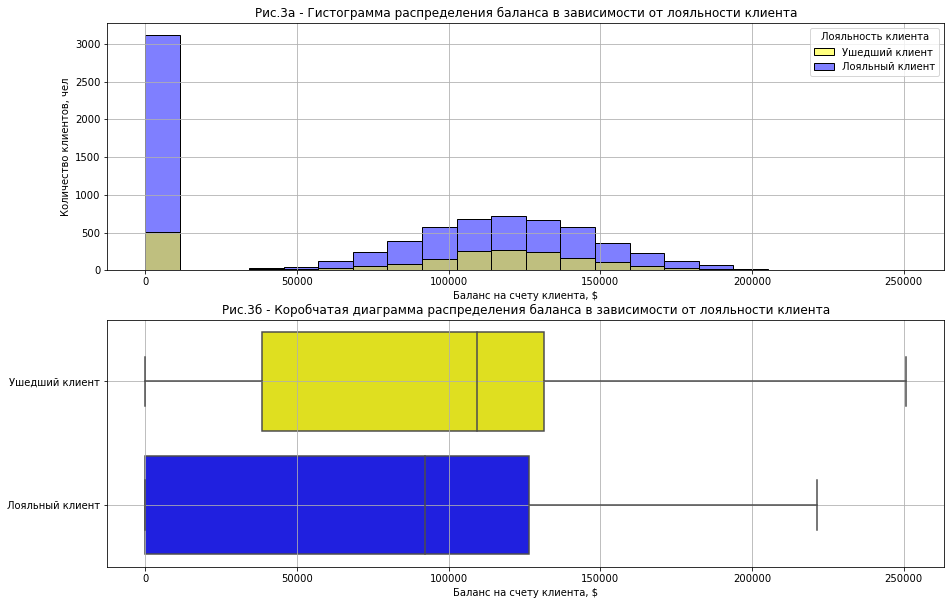

In [83]:
fig_3, axes_3 = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

histplot=sns.histplot(
    data=bank_data, 
    x="Balance", 
    hue="Лояльность клиента",
    ax=axes_3[0],
    palette=['yellow', 'blue']
)
histplot.set_title('Рис.3а - Гистограмма распределения баланса в зависимости от лояльности клиента')
histplot.set_ylabel('Количество клиентов, чел')
histplot.set_xlabel('Баланс на счету клиента, $')
histplot.grid()

boxplot=sns.boxplot(
    data=bank_data,
    y='Лояльность клиента',
    x='Balance',
    orient='h',
    ax=axes_3[1],
    palette=['yellow', 'blue']
)
boxplot.set_title('Рис.3б - Коробчатая диаграмма распределения баланса в зависимости от лояльности клиента')
boxplot.set_ylabel("")
boxplot.set_xlabel("Баланс на счету клиента, $")
boxplot.grid()


В среднем баланс на счетах ушедших клиентов (рис. 3а) значительно меньше, чем у лояльных - это говорит о том, что ушедшие клиенты не были заинтересованы в услугах банка, либо условия предоставления услуг не удовлетворяли требования ушедших клиентов.

В районе 0$ (рис. 3а) наблюдаются аномально большое количество что лояльных, что ушедших клиентов. Это говорит о том, что все клиенты не были заинтересованы в хранении своих средств на депозите, что свидетельствует о плохих условиях по вкладам.

Из рис. 3б  наблюдается явная асиметрия графиков со смещением к 0$. Это подтверждает выводы, сделанные выше о неудовлетворительных условиях по вкладам.

Ширина "ящика" (рис. 3б) Ушедших клиентов меньше, чем Лояльных, это говорит о том, балансы у Ушедших клиентов различются между собой меньше, чем у Лояльных. Возможно Ушедшие клиенты пользовались одним и тем-же (или близкими по условиям) предложением  по вкладам, который их не удовлетворил.

# Задание 9.4 #

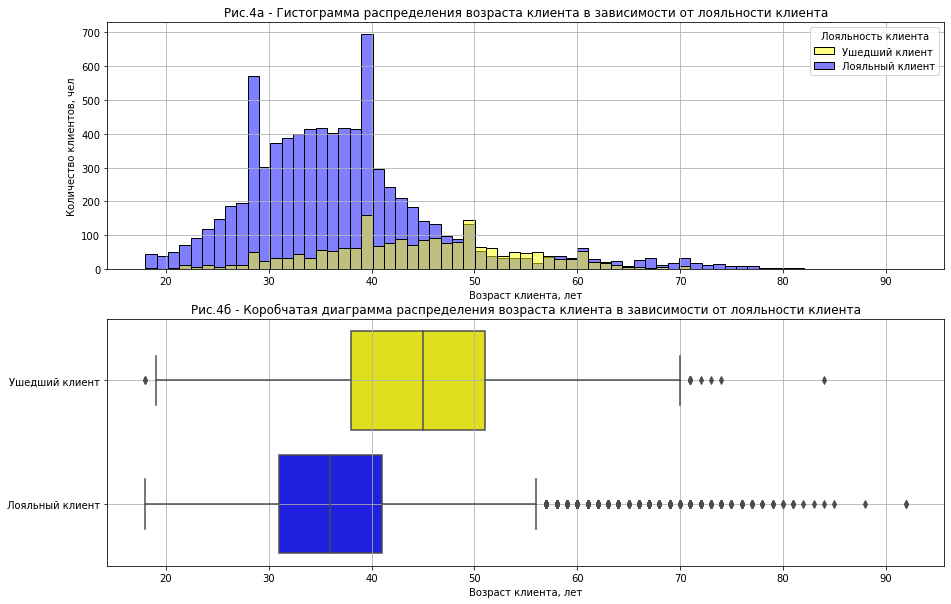

In [82]:
fig_4, axes_4 = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

histplot=sns.histplot(
    data=bank_data, 
    x="Age", 
    hue="Лояльность клиента",
    ax=axes_4[0],
    palette=['yellow', 'blue']
)
histplot.set_title('Рис.4а - Гистограмма распределения возраста клиента в зависимости от лояльности клиента')
histplot.set_ylabel('Количество клиентов, чел')
histplot.set_xlabel('Возраст клиента, лет')
histplot.grid()
boxplot=sns.boxplot(
    data=bank_data,
    y='Лояльность клиента',
    x='Age',
    orient='h',
    ax=axes_4[1],
    palette=['yellow', 'blue']
)
boxplot.set_title('Рис.4б - Коробчатая диаграмма распределения возраста клиента в зависимости от лояльности клиента')
boxplot.set_ylabel("")
boxplot.set_xlabel("Возраст клиента, лет")
boxplot.grid()


Из анализа графиков (рис. 4а, 4б) следует, что наибольшее количество выбросов наблюдается в группе Лояльных клиентов. Аномалии наблюдаются в пределах от 56 до 93 лет. 

Возраст большей части Лояльных клиентов лежит в диапазоне от 30 до 40 лет. Именно на эту возрастную категорию стоит обратить внимание банку, и, возможно, создать для них более выгодные условия.

# Задание 9.5 #

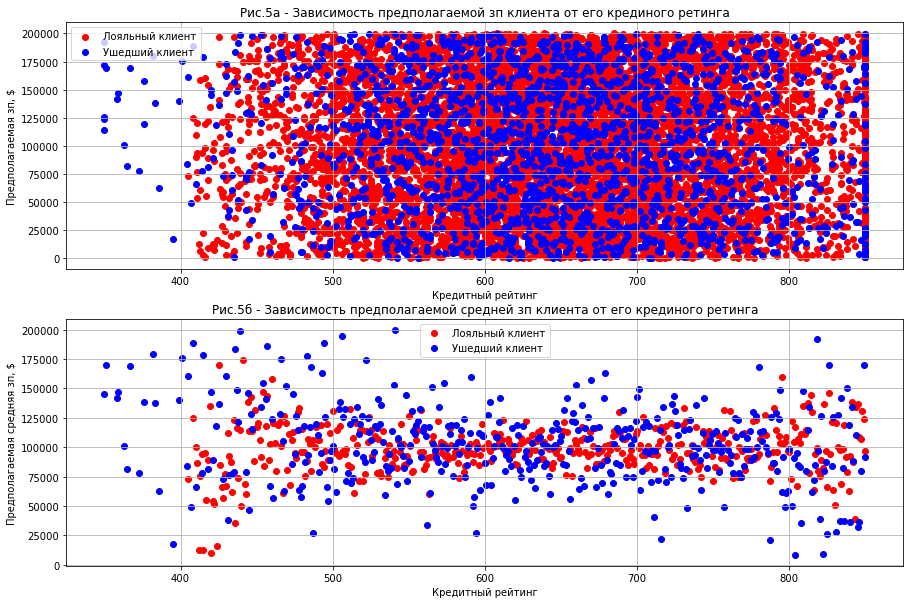

In [99]:
fig_5, axes_5 = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

axes_5[0].scatter(
    exited_0["CreditScore"], 
    exited_0["EstimatedSalary"],
    color='red',
    label="Лояльный клиент",
)
axes_5[0].scatter(
    exited_1["CreditScore"], 
    exited_1["EstimatedSalary"],
    color='blue',
    label="Ушедший клиент",
)
axes_5[0].set_title('Рис.5а - Зависимость предполагаемой зп клиента от его крединого ретинга')
axes_5[0].set_ylabel("Предполагаемая зп, $")
axes_5[0].set_xlabel("Кредитный рейтинг")
axes_5[0].legend()
axes_5[0].grid()

axes_5[1].scatter(
    exited_0.groupby('CreditScore')['EstimatedSalary'].mean().index, 
    exited_0.groupby('CreditScore')['EstimatedSalary'].mean().values,
    color='red',
    label="Лояльный клиент",
)
axes_5[1].scatter(
    exited_1.groupby('CreditScore')['EstimatedSalary'].mean().index, 
    exited_1.groupby('CreditScore')['EstimatedSalary'].mean().values,
    color='blue',
    label="Ушедший клиент",
)
axes_5[1].set_title('Рис.5б - Зависимость предполагаемой средней зп клиента от его крединого ретинга')
axes_5[1].set_ylabel("Предполагаемая средняя зп, $")
axes_5[1].set_xlabel("Кредитный рейтинг")
axes_5[1].legend()
axes_5[1].grid()

Из графика (рис. 5а) не видно явной зависимости, на первый взгляд точки расположены в хаотичном порядке. Но, если приглядется, то можно увидеть, что точки в пределах от 550 до 750 расположены более кучно. 

На графике 5б показана зависимость средней предполагаемой ЗП клиента от кредитного рейтинга. Можно заметить, что разброс точек в середине графика меньше, чем по краям. 

# Задание 9.6 #

In [48]:
exited_1['Gender'].value_counts()

Female    1139
Male       898
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Рис.6 - Доля мужчин и женщин среди ушедших клиентов')

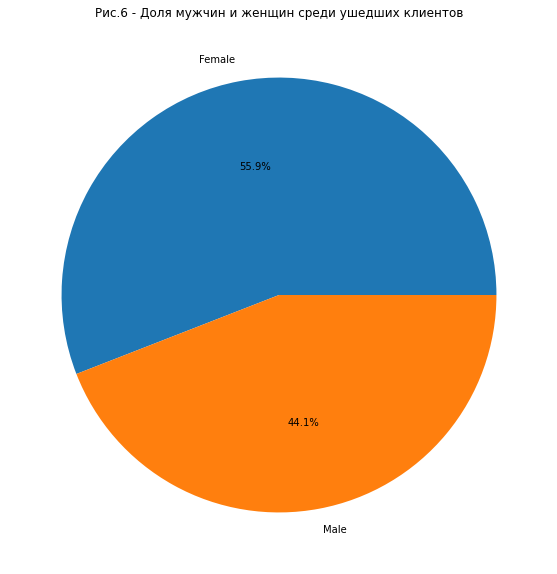

In [100]:
fig_6, axes_6 = plt.subplots(figsize=(15, 10))
axes_6.pie(
    exited_1['Gender'].value_counts(),
    labels=exited_1['Gender'].value_counts().index,
    autopct='%.1f%%'
)
axes_6.set_title('Рис.6 - Доля мужчин и женщин среди ушедших клиентов')

Большая часть ушедших клиентов (55,9%) - женщины

# Задание 9.7 #

In [50]:
pivot_1 = bank_data.pivot_table(
    'CustomerId',
    index='NumOfProducts',
    columns='Лояльность клиента',
    aggfunc='count'
)
pivot_1=pivot_1.fillna(0)
pivot_1

Лояльность клиента,Лояльный клиент,Ушедший клиент
NumOfProducts,,
1,3675.0,1409.0
2,4242.0,348.0
3,46.0,220.0
4,0.0,60.0


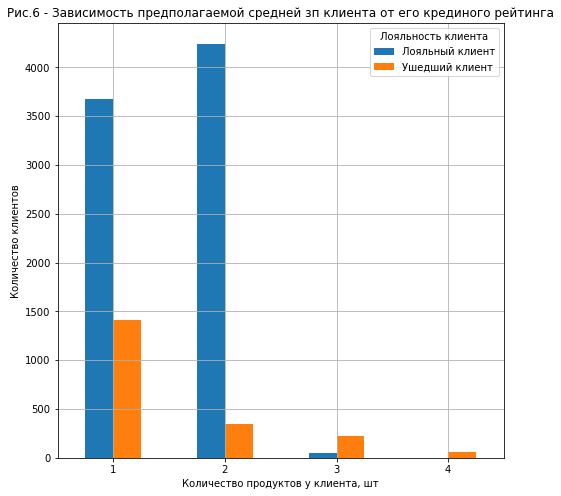

In [51]:
fig_7, axes_7 = plt.subplots(figsize=(8, 8))
pivot_1.plot(kind='bar', ax=axes_7)
axes_7.set_title('Рис.6 - Зависимость предполагаемой средней зп клиента от его крединого рейтинга')
axes_7.set_xlabel('Количество продуктов у клиента, шт')
axes_7.set_ylabel('Количество клиентов')
axes_7.tick_params(axis='x', labelrotation = 0)
axes_7.grid()

Из анализа графика (рис. 6) наблюдается явная обратная зависимость числа ушедших клиентов от количества продуктов. Возможно это связано с тем, что с возрастанием количества продуктов, их условия все больше и больше удовлетворяли потребности клиента.

# Задание 9.8 #

In [52]:
bank_data['Статус активного клиента'] = bank_data['IsActiveMember'].apply(lambda x: 'Активный' if x==1 else 'Неактивный')

pivot_2 = bank_data.pivot_table(
    'CustomerId',
    index='Статус активного клиента',
    columns='Лояльность клиента',
    aggfunc='count'
)
pivot_2

Лояльность клиента,Лояльный клиент,Ушедший клиент
Статус активного клиента,,
Активный,4416,735
Неактивный,3547,1302


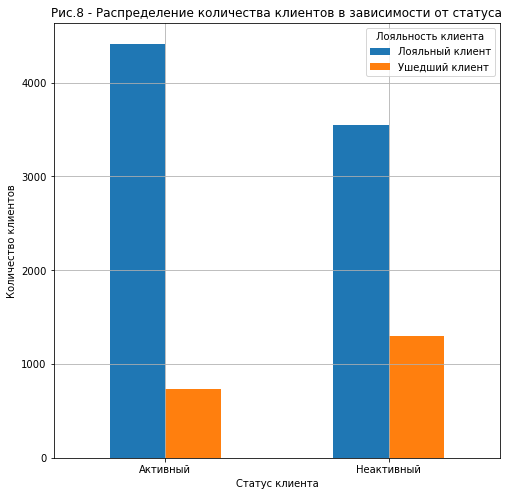

In [101]:
fig_8, axes_8 = plt.subplots(figsize=(8, 8))
pivot_2.plot(kind='bar', ax=axes_8)
axes_8.set_title('Рис.8 - Распределение количества клиентов в зависимости от статуса')
axes_8.set_xlabel('Статус клиента')
axes_8.set_ylabel('Количество клиентов')
axes_8.tick_params(axis='x', labelrotation = 0)
axes_8.grid()

Из графика (рис.8) видно, что количество активных и лояльных клиентов преобладает над неактивными, а отток наблюдается, в большей части, у неактивных клиентов.

Для уменьшения оттока клиентов, необходимо увеличить активность клиентов - это значит сделать более интересные и выгодные предложения клиентам по продуктам.

# Задание 9.9 #

In [54]:
country_info=bank_data[bank_data['Exited'] == 1].groupby('Geography')['Exited'].count()
country_info

Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64

In [102]:
fig = px.choropleth(
    data_frame=country_info, 
    locations=country_info.index, 
    locationmode = "country names",
    color=country_info.values,
    title='Рис. 9 - Количество ушедших клиентов по странам мира',
    range_color=[413, 814],
    width=800,
    height=500, 
    color_continuous_scale='YlGnBu'
)
fig.show()

Количество ушедших клиентов (рис. 9) во Франции и Германии в два раза больше, чем в Испании. Возможно это связано с тем, что в отмеченных странах имеются свои банки с более выгодными условиями. 

# Задание 9.10 #

In [56]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 851:
        return "Top"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score < 300:
        return "Deep"

In [61]:
bank_data['CreditScoreCat'] = bank_data['CreditScore'].apply(get_credit_score_cat)
pivot = bank_data.pivot_table(
    'Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)
pivot

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


Text(0.5, 69.0, 'Количество лет, в течение которых клиент пользуется услугами банка')

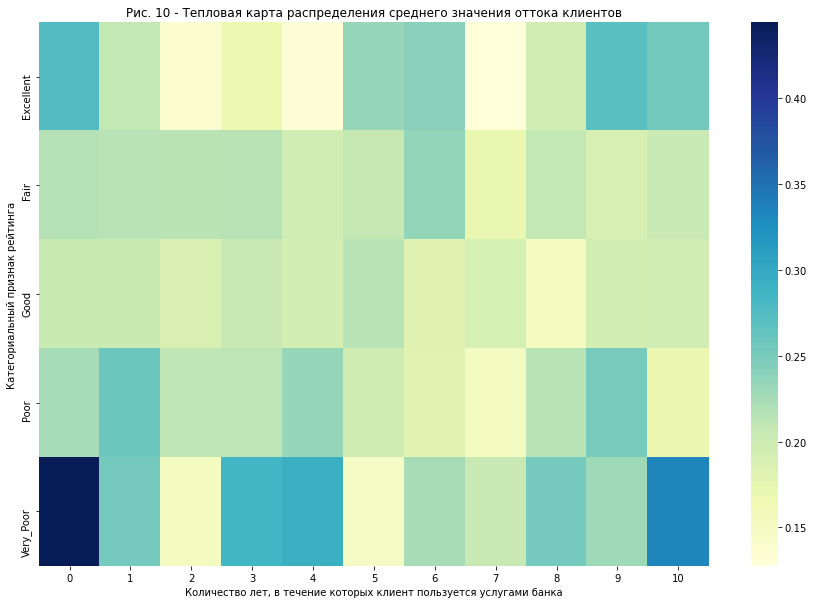

In [84]:
fig_9, axes_9 = plt.subplots(figsize=(15, 10))
heatmap = sns.heatmap(data=pivot, ax=axes_9, cmap='YlGnBu')
heatmap.set_title('Рис. 10 - Тепловая карта распределения среднего значения оттока клиентов');
heatmap.set_ylabel('Категориальный признак рейтинга')
heatmap.set_xlabel('Количество лет, в течение которых клиент пользуется услугами банка')

На графике (рис. 10) явно выделяется область, где наблюдается максимальный отток клиентов - это клиенты, пользующиеся услугами банка меньше года, и имеющие статус Very_Poor.

В центре диаграммы цвета распределены равномерно, что свидетельствует  о нормальном распределении параметров. 

В целом, у клиентов со статусом, Very_Poor наблюдается более высокий отток, по сравнению с другими статусами.

Т.е. можно сказать, что наименее богатые клиенты чаще всего отказываются от услуг банка.